In [378]:
import numpy as np
import pandas as pd
import sns as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# CAS Data Science Projekt Sleep Analysis - Linear Regression

# Prepare data


In [379]:
data = pd.read_csv('prepared/fitbit_data_moon_crisp.csv', index_col=0)
data.dropna(inplace=True)
data.drop(columns=['date', 'revitalization_score'], inplace=True)
data.drop(columns=['restlessness'], inplace=True)
data['scaled_temperature'] = data['temperature'].apply(lambda x: 80+x)
data.drop(columns=['temperature'], inplace=True)

data.rename(columns={'overall_score':'score', 'duration_score':'DUS', 'deep_sleep_in_minutes':'DS', 'composition_score':'CS', 'Moon Phase': 'moon', 'scaled_temperature':'temp','resting_heart_rate':'RHR', 'bpm':"BPM"}, inplace=True)
data = pd.get_dummies(data, columns=['moon'])

In [380]:
data.head(5)

,score,CS,DUS,DS,RHR,BPM,temp,moon_First Quarter,moon_Full Moon,moon_New Moon,moon_Third Quarter
0,67,17,35,66,60,68.873969,77.505155,0,0,1,0
2,88,21,45,126,60,67.206731,76.899359,1,0,0,0
3,56,15,26,23,56,67.187992,76.917705,0,0,0,1
4,75,20,36,69,55,69.163313,77.016326,1,0,0,0
5,68,19,31,69,60,61.607115,77.858560,0,0,1,0


In [381]:
# Split data into X and y
X_data = data.drop(columns='score')
y_data = data.score

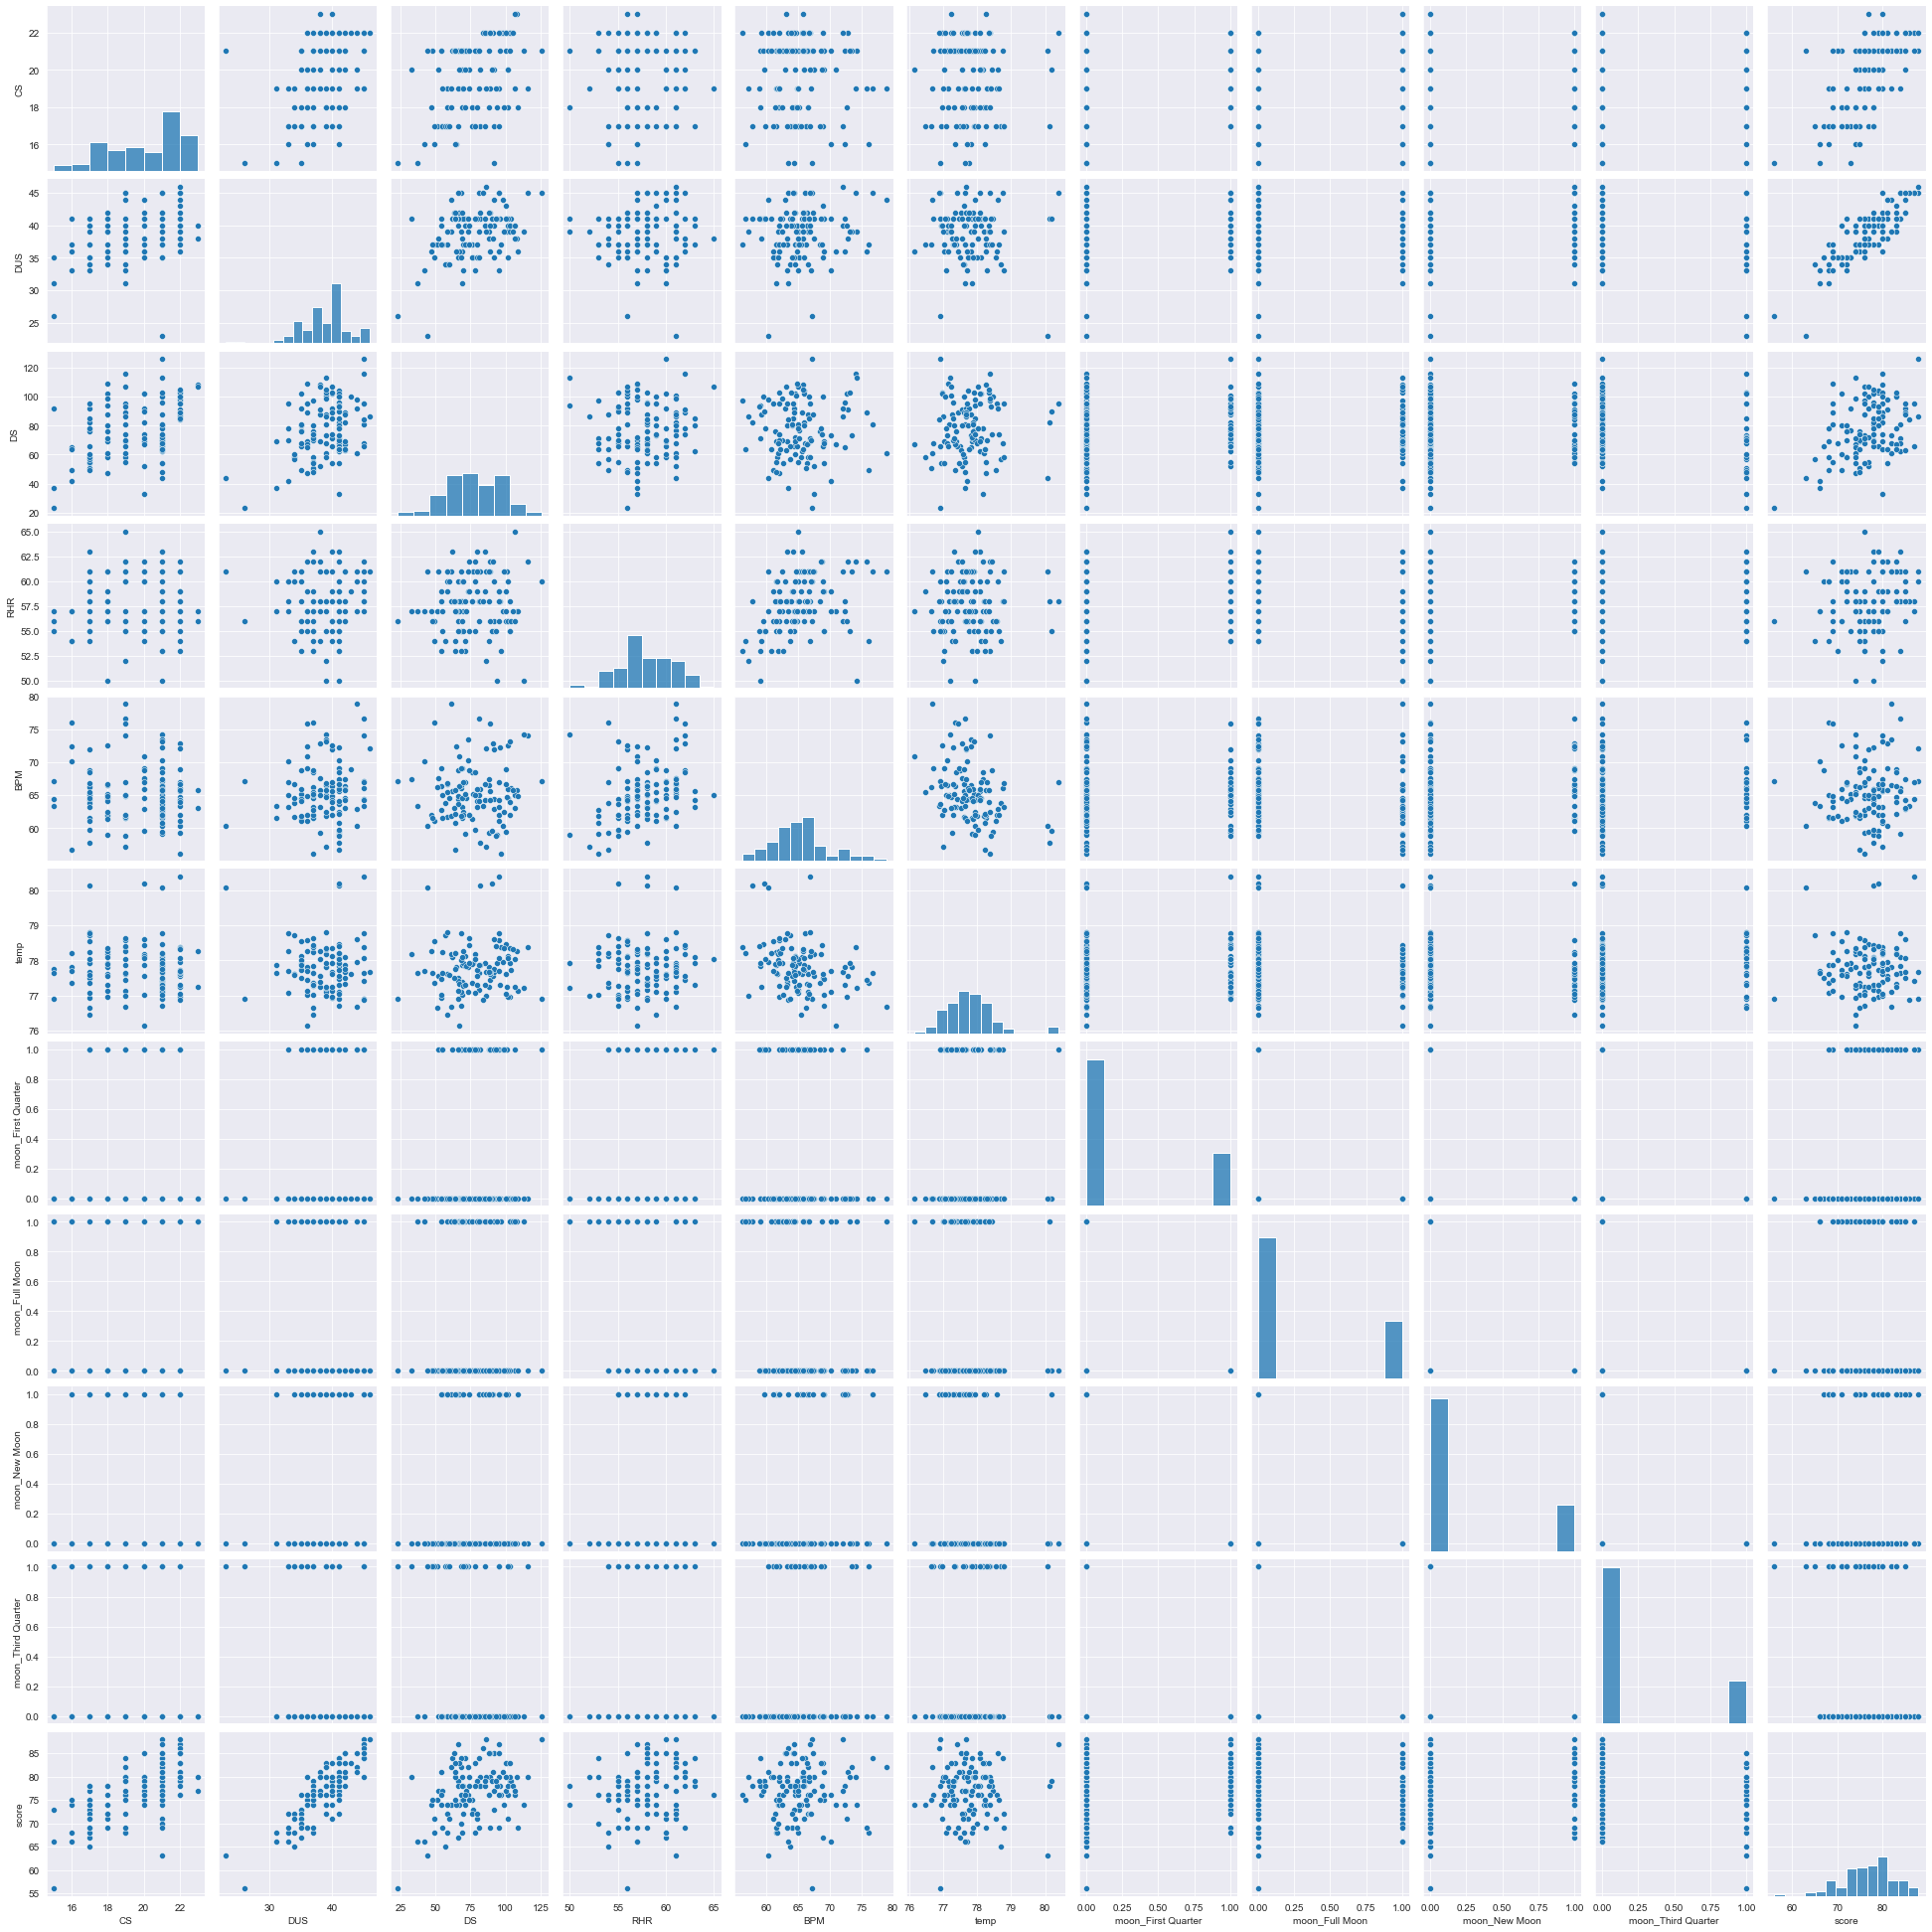

In [382]:
sns.pairplot(pd.concat([X_data, y_data], axis=1))
plt.show()

In [383]:
# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, shuffle = True)

In [384]:
# same for the validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state= 8)

In [385]:
print("X_train shape: {}".format(X_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("X_val shape: {}".format(y_train.shape))

X_train shape: (65, 10)
X_test shape: (30, 10)
X_val shape: (65,)


In [386]:
print("y_train shape: {}".format(y_train.shape))
print("y_test shape: {}".format(y_test.shape))
print("y val shape: {}".format(y_test.shape))

y_train shape: (65,)
y_test shape: (30,)
y val shape: (30,)


<AxesSubplot:xlabel='DUS', ylabel='score'>

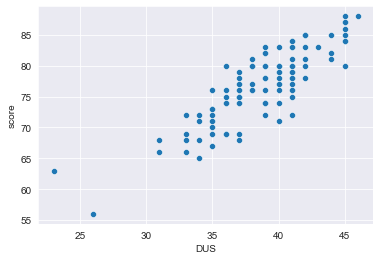

In [387]:
sns.scatterplot(data=pd.concat([X_data, y_data], axis=1), x='DUS', y='score')

# Define and train model

In [388]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [389]:
# # Define model
# pipe = Pipeline([
#     ('ohe', make_column_transformer(
#         (OneHotEncoder(handle_unknown='ignore'),
#         ['moon']))
#     ),
#     ('reg', LinearRegression())
# ])
#
# from sklearn import set_config
#
# set_config(display="diagram")
# pipe


In [390]:
X_train

,CS,DUS,DS,RHR,BPM,temp,moon_First Quarter,moon_Full Moon,moon_New Moon,moon_Third Quarter
17,19,34,58,60,61.696459,77.607491,0,0,1,0
64,22,40,89,61,65.666312,77.612564,1,0,0,0
69,19,36,95,56,62.005037,78.580434,0,0,1,0
144,18,36,109,57,64.865656,77.140018,0,0,1,0
118,23,38,108,57,65.795659,78.255788,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
34,21,42,67,58,66.390847,77.338978,0,0,1,0
166,15,31,37,57,63.428552,77.643058,0,1,0,0
121,22,44,98,57,60.324661,77.944861,1,0,0,0
62,17,37,55,55,61.605894,78.247445,0,0,1,0


In [418]:
lr = LinearRegression()

In [419]:
lr.fit(X_train, y_train)
y_val_hat = lr.predict(X_val)

In [420]:
intercept = lr.intercept_
slope = lr.coef_[0]

print('intercept: '+ str(intercept))
print('slope: '+ str(slope))


intercept: 1.3284659935883383
slope: 0.7130235784086407


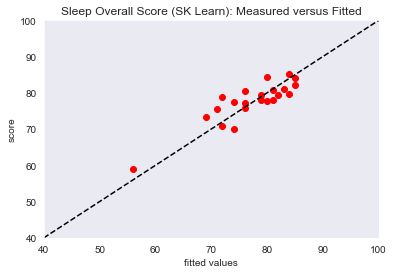

In [421]:
plt.close()

plt.scatter(y_val, y_val_hat, color='red')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score (SK Learn): Measured versus Fitted')
plt.xlabel('fitted values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()

In [422]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_val, y_val_hat)

10.032997149403103

3.5067829189558393


# Predict Test Set

In [424]:
y_test_hat = lr.predict(X_test)

In [425]:
# How good are we on the test data?
mean_squared_error(y_test, y_test_hat)

4.091447361809177

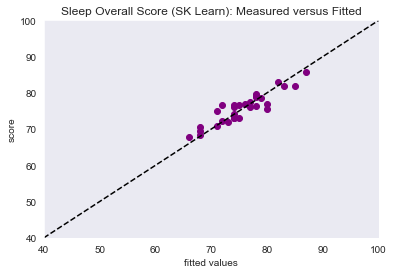

In [428]:
plt.close()

plt.scatter(y_test, y_test_hat, color='purple')
plt.xlim([40,100])
plt.ylim([40,100])
plt.grid()
plt.axhline(y=0, color='black', linewidth=0.5)
plt.axvline(x=0, color='black', linewidth=0.5)
plt.title('Sleep Overall Score (SK Learn): Measured versus Fitted')
plt.xlabel('fitted values')
plt.ylabel('score')
plt.axline((1, 1), slope=1, color='black', ls="--")
plt.show()